In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [47]:
data= pd.read_csv('../Datas/time series data/jshare.CSV')

In [48]:
data.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


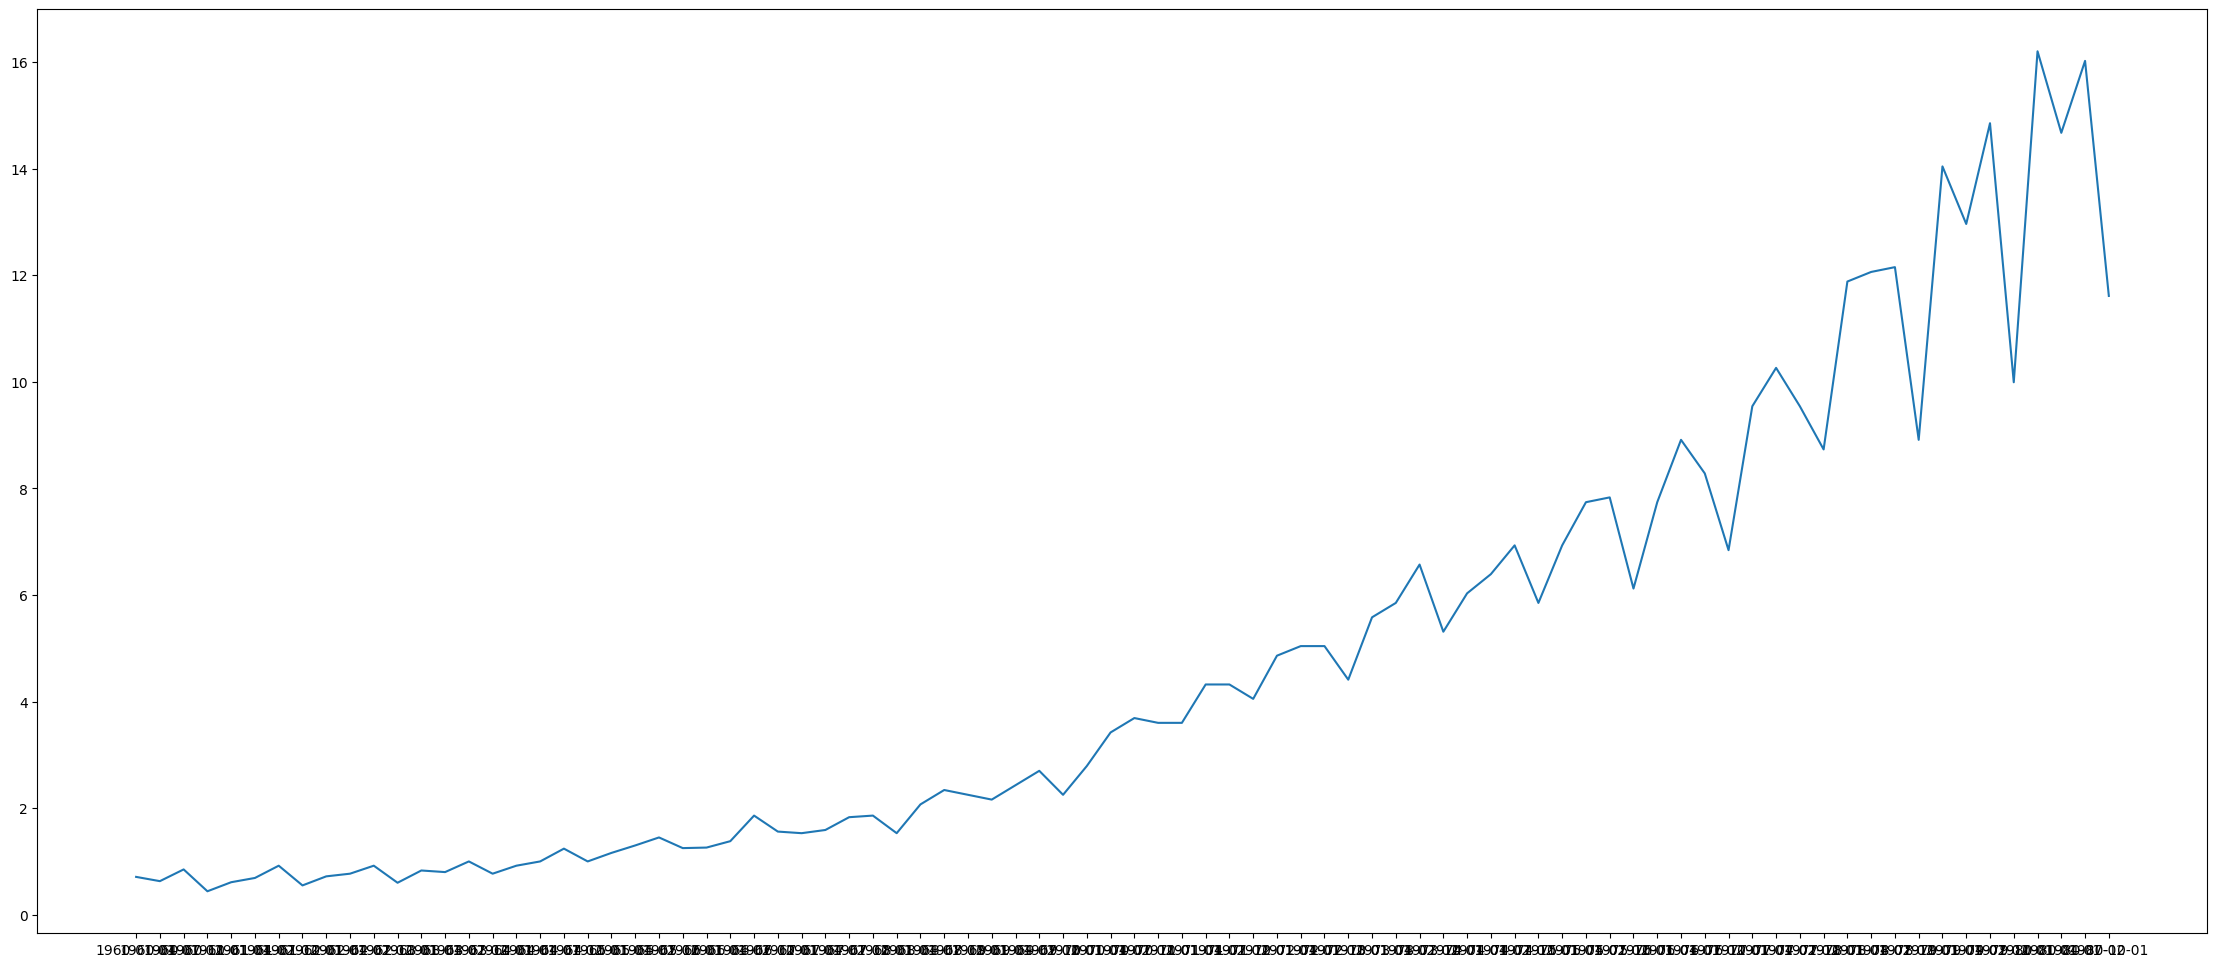

In [49]:
plt.figure(figsize=(28,12))
plt.plot(data['date'],data['data'])

In [50]:
from statsmodels.tsa.stattools import adfuller

In [51]:
adfuller(data['data'])

(2.7420165734574735,
 1.0,
 11,
 72,
 {'1%': -3.524624466842421,
  '5%': -2.9026070739026064,
  '10%': -2.5886785262345677},
 82.63760283301102)

In [52]:
data['data']=np.log(data['data'])

In [53]:
adfuller(data['data'])

(-0.8040574622338387,
 0.8179273123168606,
 4,
 79,
 {'1%': -3.5159766913976376,
  '5%': -2.898885703483903,
  '10%': -2.5866935058484217},
 -142.1892728398871)

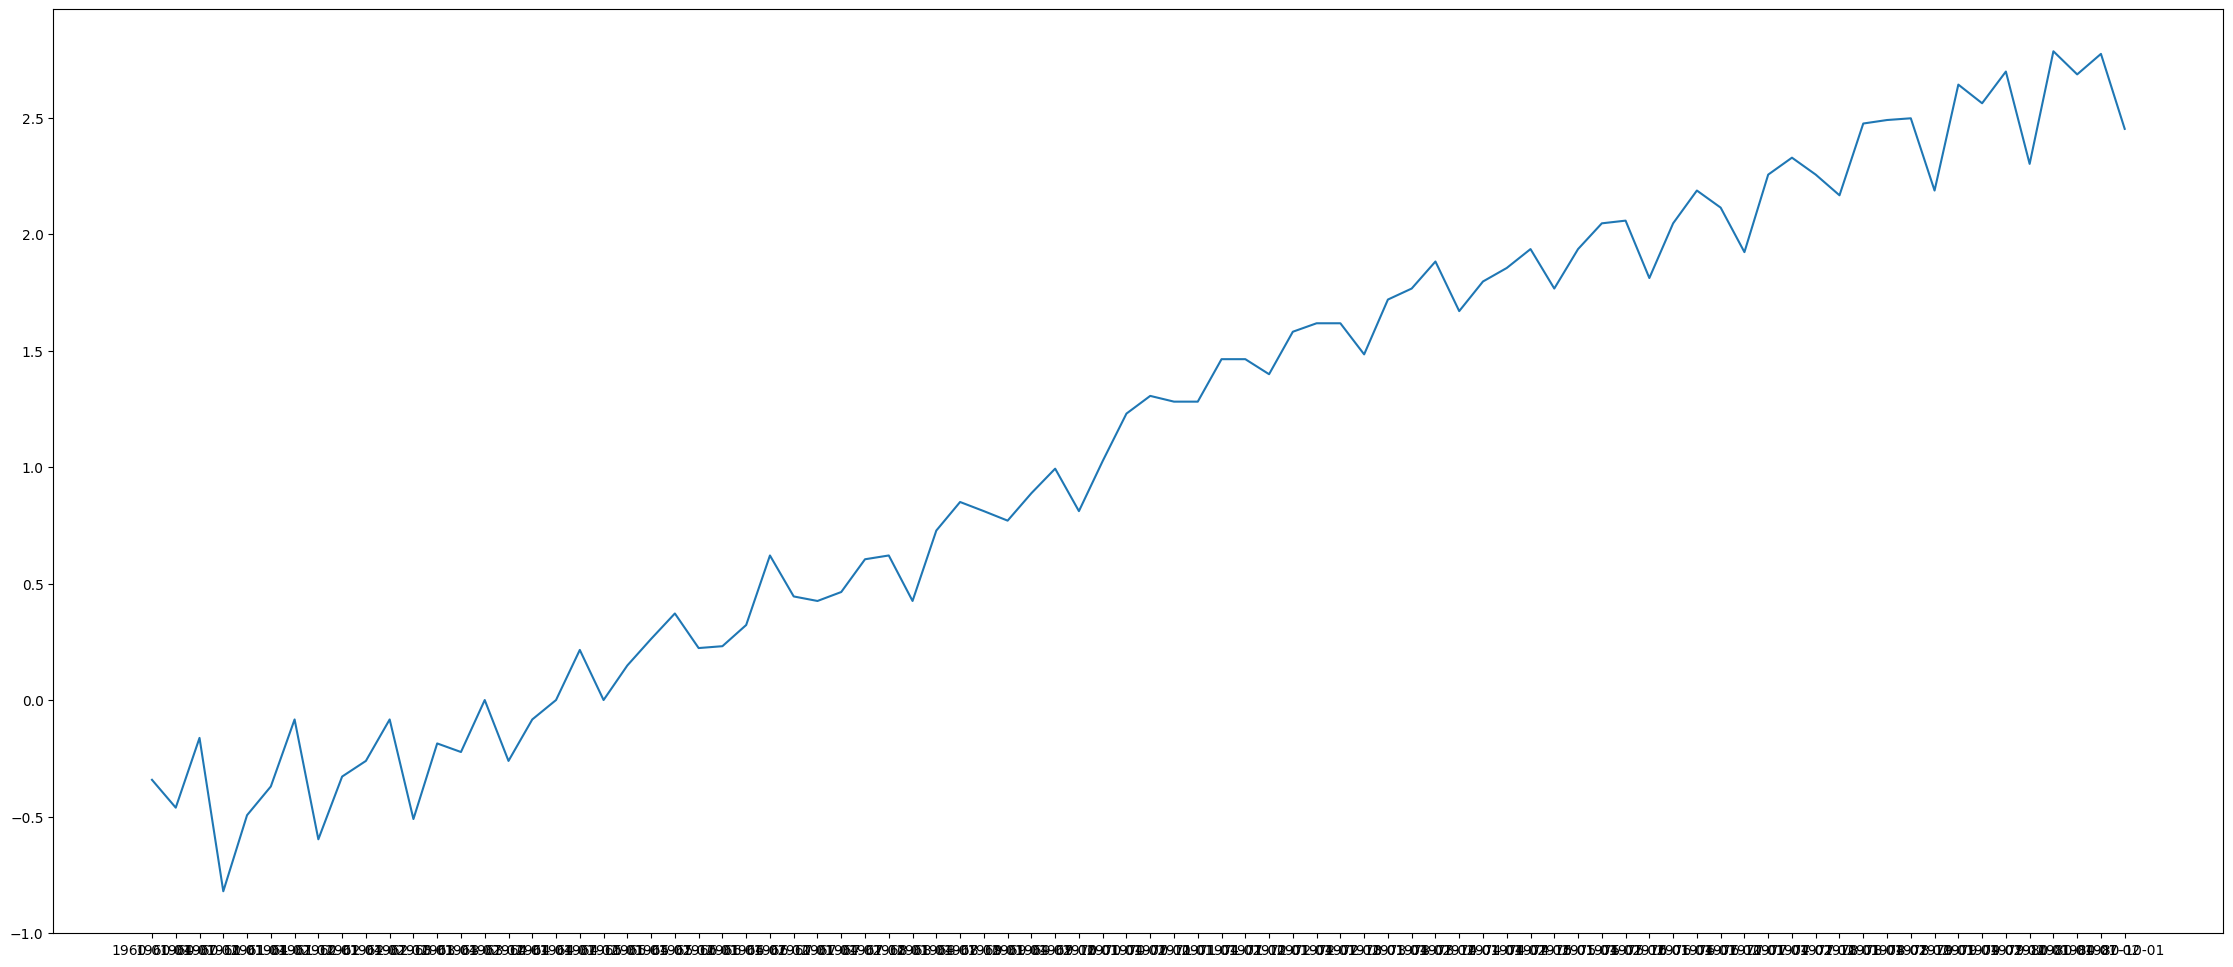

In [54]:
plt.figure(figsize=(28,12))
plt.plot(data['date'],data['data'])

In [55]:
sample=pd.Series([1,2,6,4,8,6,7,8,9,10])
sample.diff()

0    NaN
1    1.0
2    4.0
3   -2.0
4    4.0
5   -2.0
6    1.0
7    1.0
8    1.0
9    1.0
dtype: float64

In [56]:
data['data']=data['data'].diff()

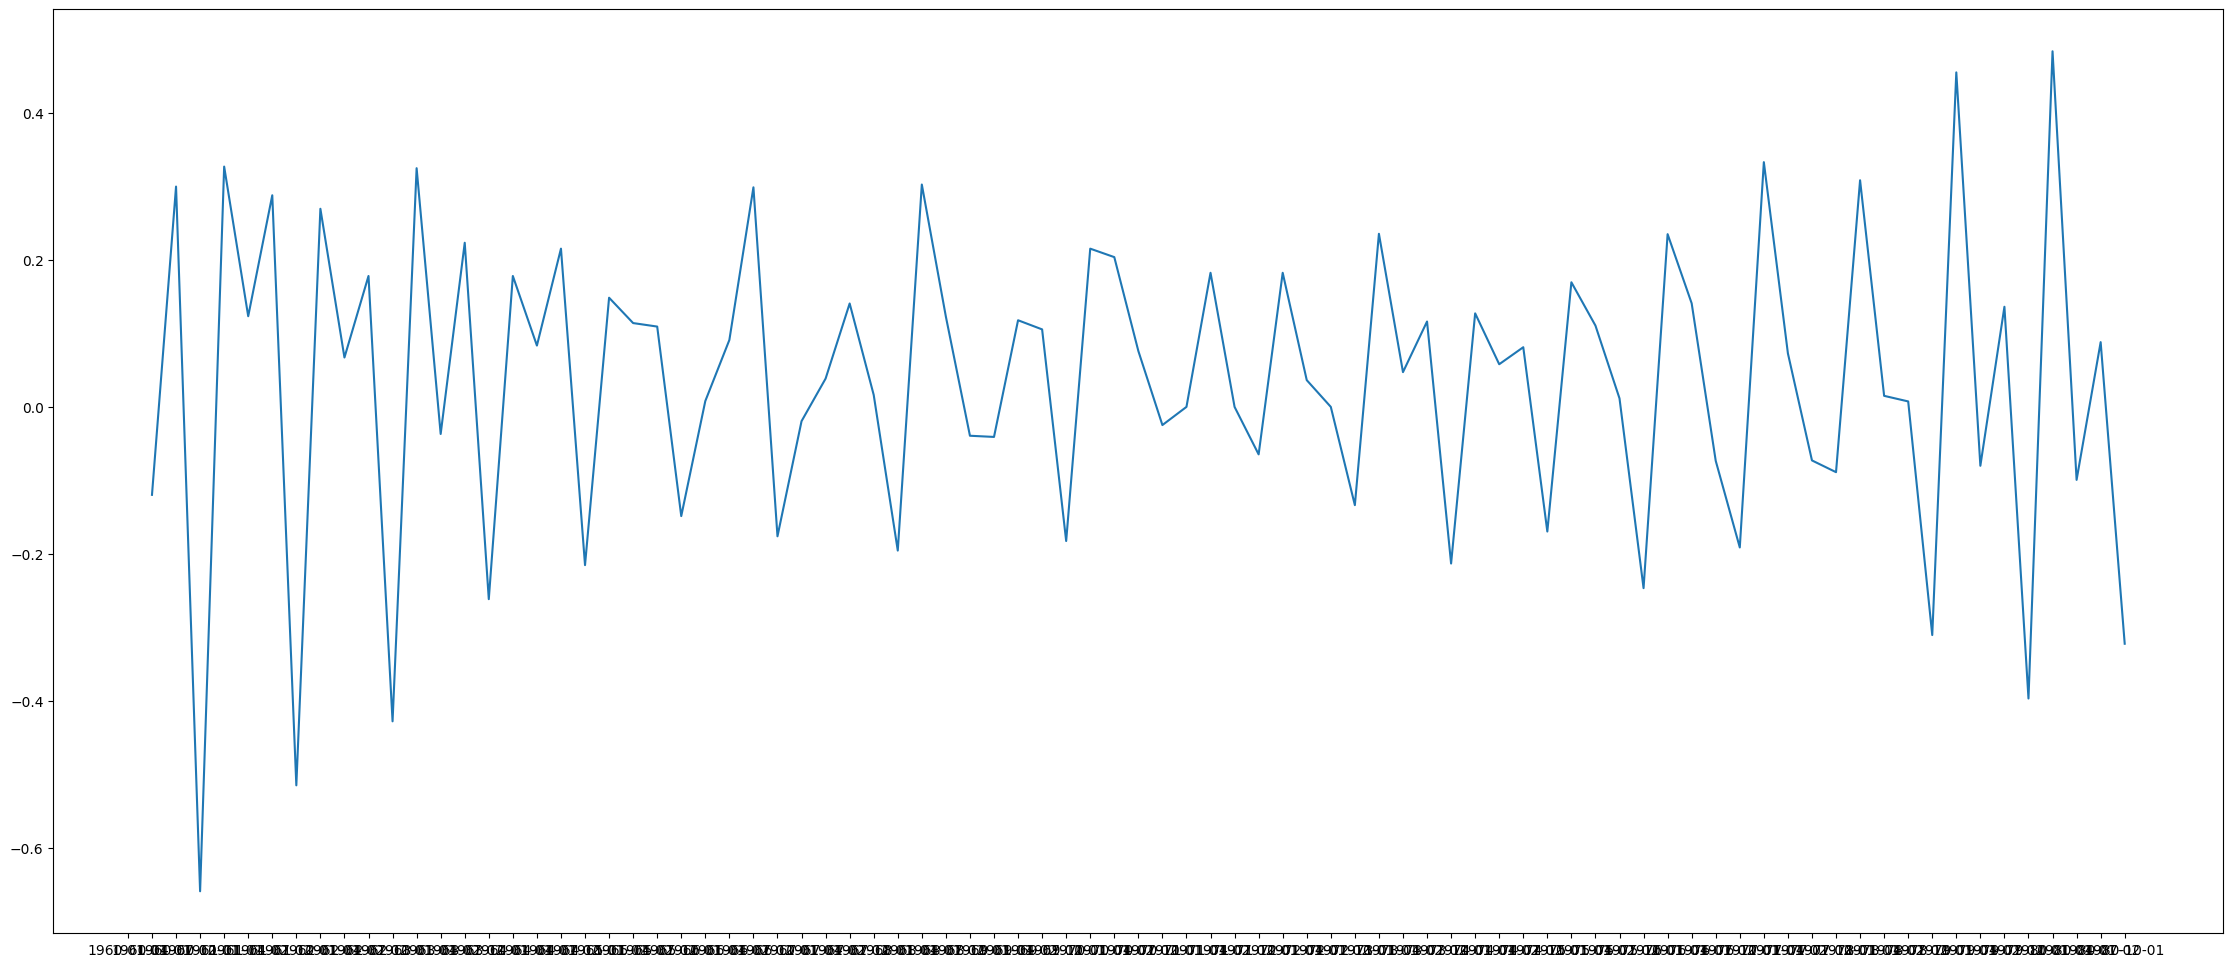

In [57]:
plt.figure(figsize=(28,12))
plt.plot(data['date'],data['data'])

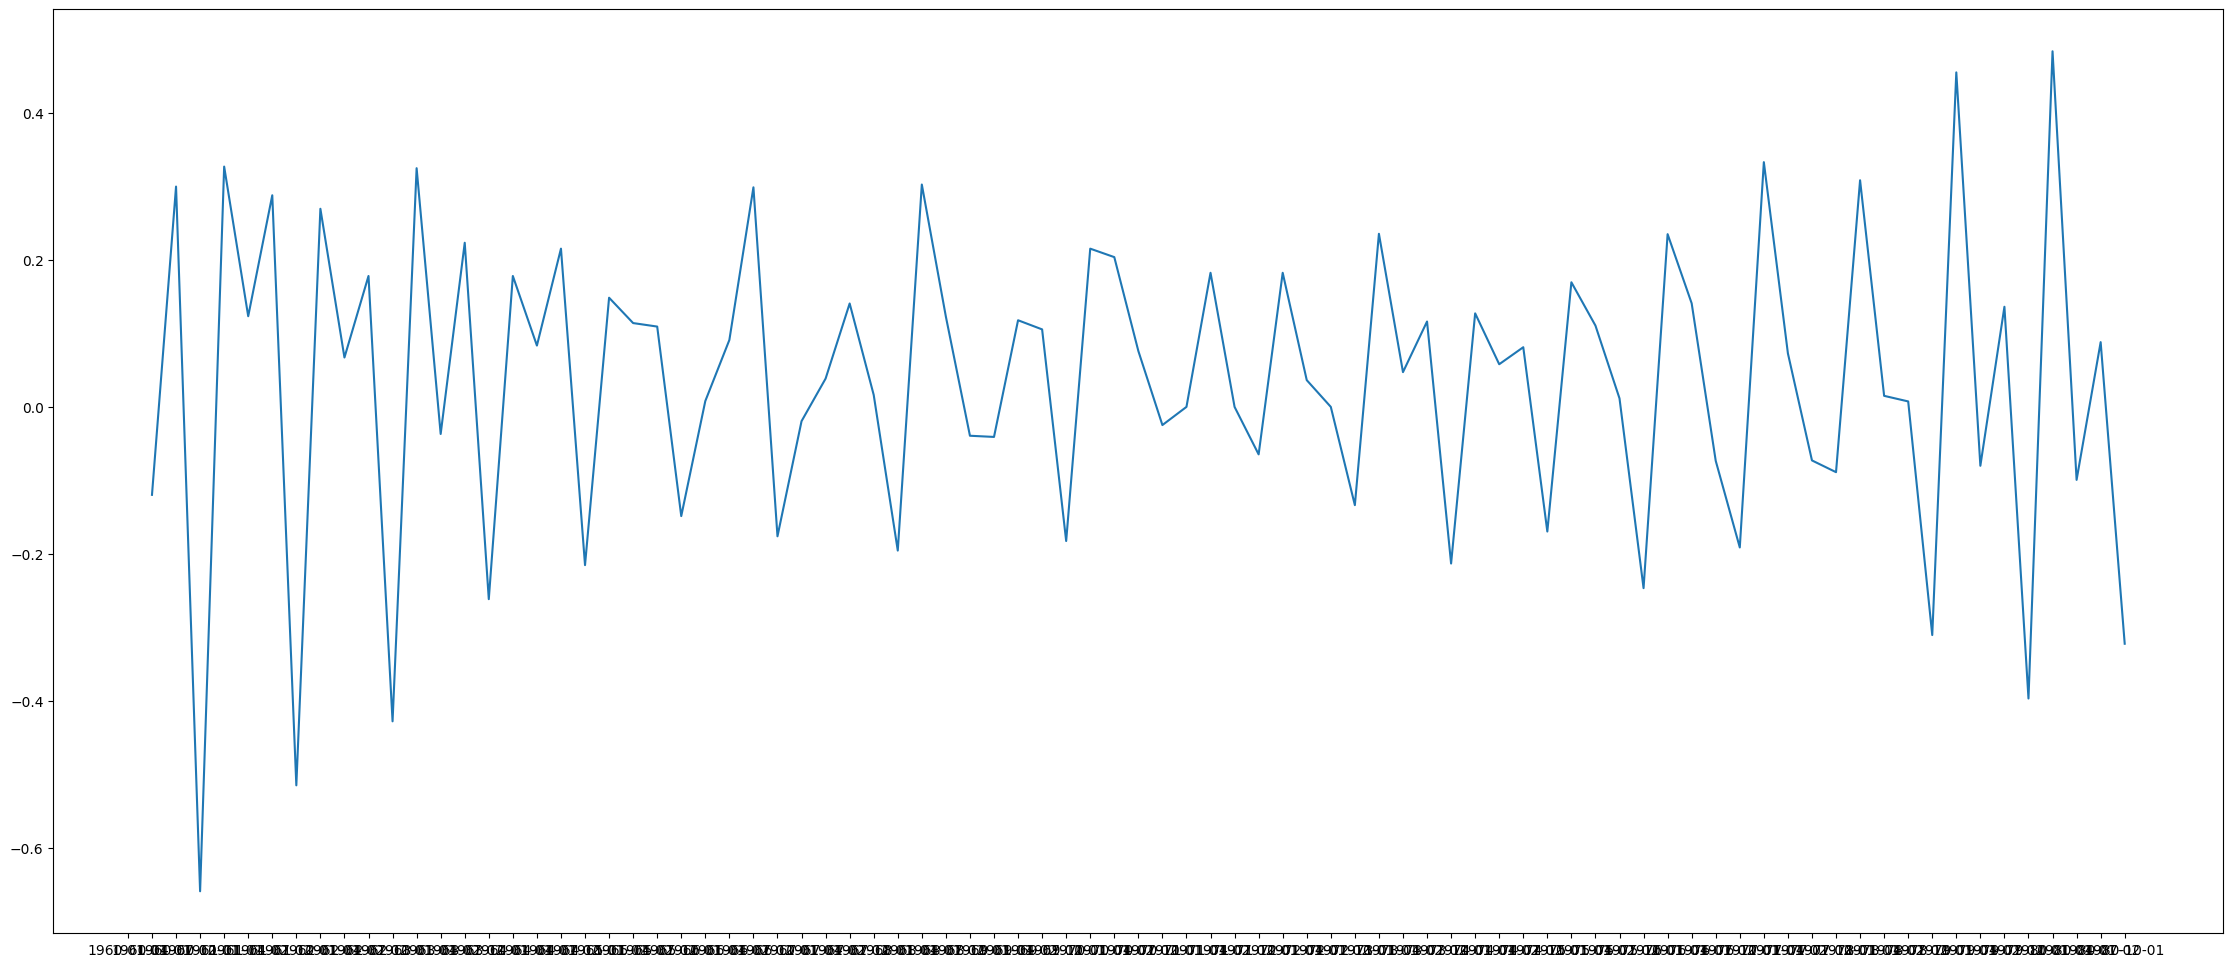

In [58]:
plt.figure(figsize=(28,12))
plt.plot(data['date'],data['data'])

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [60]:
data2= pd.read_csv('../Datas/time series data/jshare.CSV')


In [61]:
model=SARIMAX(data2['data'],order=(3,1,3),seasonal_order=(2,1,2,4))

In [62]:
res=model.fit()

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [63]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                   data   No. Observations:                   84
Model:             SARIMAX(3, 1, 3)x(2, 1, [1, 2], 4)   Log Likelihood                 -38.999
Date:                                Tue, 14 Mar 2023   AIC                             99.997
Time:                                        20:10:15   BIC                            126.061
Sample:                                             0   HQIC                           110.439
                                                 - 84                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5927      0.207     -7.705      0.000      -1.998      -1.188
ar.L2         -0.9776      0.328     -2.979      0.003      -1.621      -0.334
ar.L3         -0.1340      0.194     -0.689      0.491      -0.515       0.247
ma.L1          0.8389      0.764      1.098      0.272      -0.659       2.336
ma.L2          0.0033      0.533      0.006      0.995      -1.042       1.048
ma.L3         -0.6606      0.676     -0.977      0.328      -1.985       0.664
ar.S.L4       -0.3728      0.757     -0.492      0.623      -1.857       1.112
ar.S.L8       -0.7953      0.803     -0.990      0.322      -2.370       0.779
ma.S.L4        0.2714      0.750      0.362      0.717      -1.198       1.741
ma.S.L8        0.8811      0.845      1.042      0.297      -0.776       2.538
sigma2         0.1441      0.156      0.925      0.355      -0.161       0.450
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                22.36
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):              26.55   Skew:                            -0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
data2['sarimax']=res.fittedvalues

In [65]:
data2

,date,data,sarimax
0,1960-01-01,0.71,0.000000
1,1960-04-01,0.63,0.710000
2,1960-07-02,0.85,0.630000
3,1960-10-01,0.44,0.850000
4,1961-01-01,0.61,0.795000
...,...,...,...
79,1979-10-01,9.99,10.300235
80,1980-01-01,16.20,16.238466
81,1980-04-01,14.67,14.386682
82,1980-07-02,16.02,16.720911


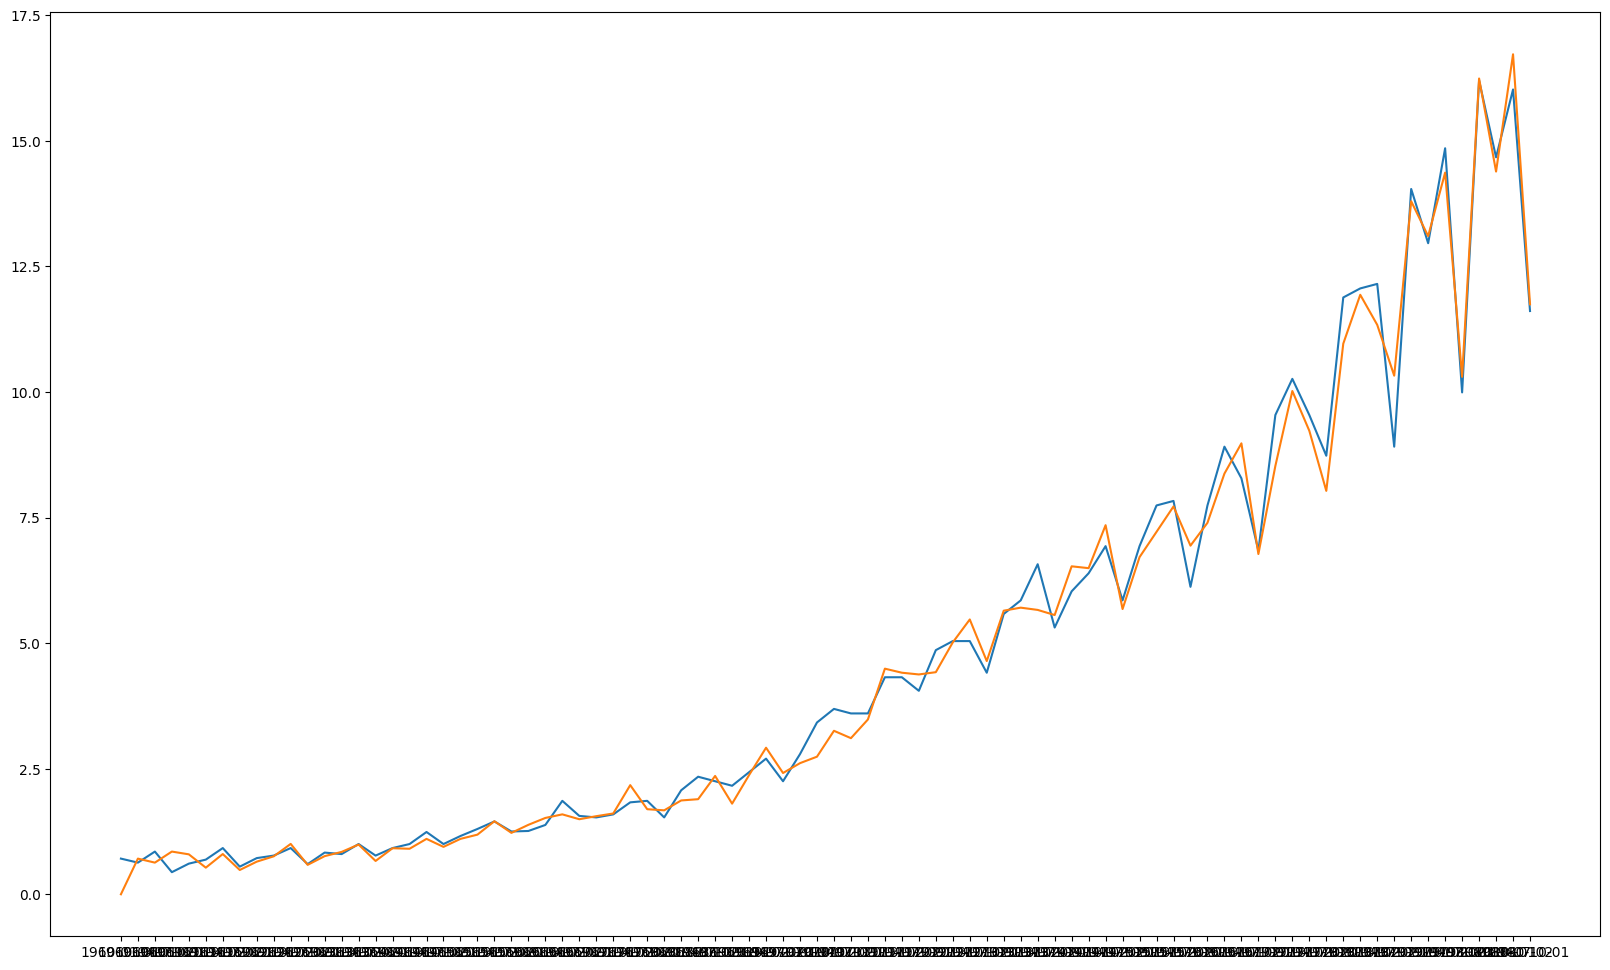

In [66]:
plt.figure(figsize=(20,12))
plt.plot(data2['date'],data2['data'])
plt.plot(data2['date'],data2['sarimax'])
plt.show()

In [67]:
data2['sarimax'][:5]=np.NAN
forcast=res.predict(start=len(data2),end=len(data2)+8)

C:\Users\hp\AppData\Local\Temp\ipykernel_12864\245681068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['sarimax'][:5]=np.NAN


In [68]:
forcast

84    17.363567
85    16.556630
86    17.316293
87    12.993893
88    18.879424
89    17.849764
90    18.879628
91    14.361371
92    20.409919
Name: predicted_mean, dtype: float64

In [69]:
data2['sarimax'].append(forcast)

C:\Users\hp\AppData\Local\Temp\ipykernel_12864\2830538582.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2['sarimax'].append(forcast)


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
        ...    
88    18.879424
89    17.849764
90    18.879628
91    14.361371
92    20.409919
Length: 93, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_12864\2626898631.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real_data=data2['data'].append(pd.Series([0,0,0,0,0,0,0,0]))


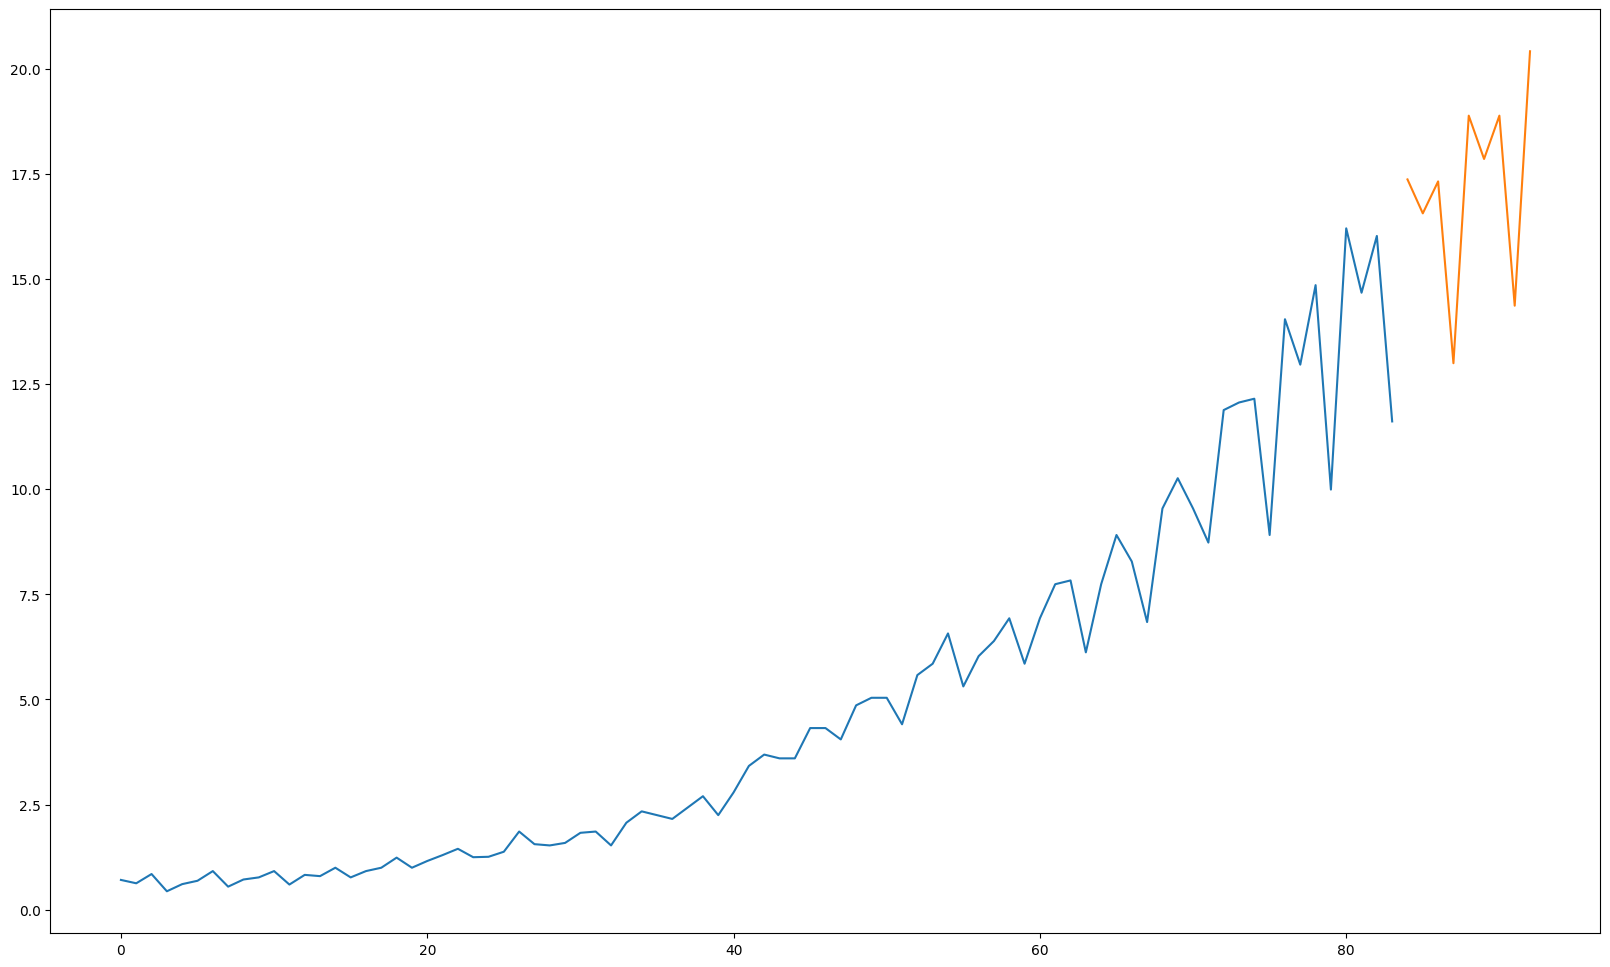

In [70]:
plt.figure(figsize=(20,12))
real_data=data2['data'].append(pd.Series([0,0,0,0,0,0,0,0]))
plt.plot(data2['data'])
plt.plot(forcast)
plt.show()

In [71]:
from itertools import product
p=range(0,2,1)
d=1
q=range(0,2,1)
ps=range(0,2,1)
ds=1
qs=range(0,2,1)
s=4
params=list(product(p,q,ps,qs))
params

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

In [75]:
result=[]
for order in params:
    try:
        model=SARIMAX(data2['data'],order=(order[0],d,order[1]),seasonal_order=(order[2],ds,order[3],4))
        res=model.fit()
        result.append([order,res.aic])
    except:
        continue
                
                


In [76]:
r=pd.DataFrame(result)
r.columns=('order','AIC')
r.sort_values(by='AIC',ascending=True)

,order,AIC
12,"(1, 1, 0, 0)",98.207760
4,"(0, 1, 0, 0)",100.126011
14,"(1, 1, 1, 0)",100.166907
13,"(1, 1, 0, 1)",100.170544
8,"(1, 0, 0, 0)",100.206514
6,"(0, 1, 1, 0)",100.713769
5,"(0, 1, 0, 1)",100.714480
7,"(0, 1, 1, 1)",101.256783
9,"(1, 0, 0, 1)",102.158002
15,"(1, 1, 1, 1)",102.160852


In [82]:
model=SARIMAX(data2['data'],order=(1,1,1),seasonal_order=(0,1,0,4))
res=model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               data   No. Observations:                   84
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 4)   Log Likelihood                 -46.104
Date:                            Tue, 14 Mar 2023   AIC                             98.208
Time:                                    20:16:19   BIC                            105.316
Sample:                                         0   HQIC                           101.056
                                             - 84                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3005      0.142     -2.114      0.035      -0.579      -0.022
ma.L1         -0.6118      0.091     -6.739      0.000      -0.790      -0.434
sigma2         0.1860      0.023      8.108      0.000       0.141       0.231
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                31.82
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):              33.35   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
data2['sarimax'].append(forcast)

C:\Users\hp\AppData\Local\Temp\ipykernel_12864\2830538582.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2['sarimax'].append(forcast)


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
        ...    
88    18.879424
89    17.849764
90    18.879628
91    14.361371
92    20.409919
Length: 93, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_12864\2626898631.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  real_data=data2['data'].append(pd.Series([0,0,0,0,0,0,0,0]))


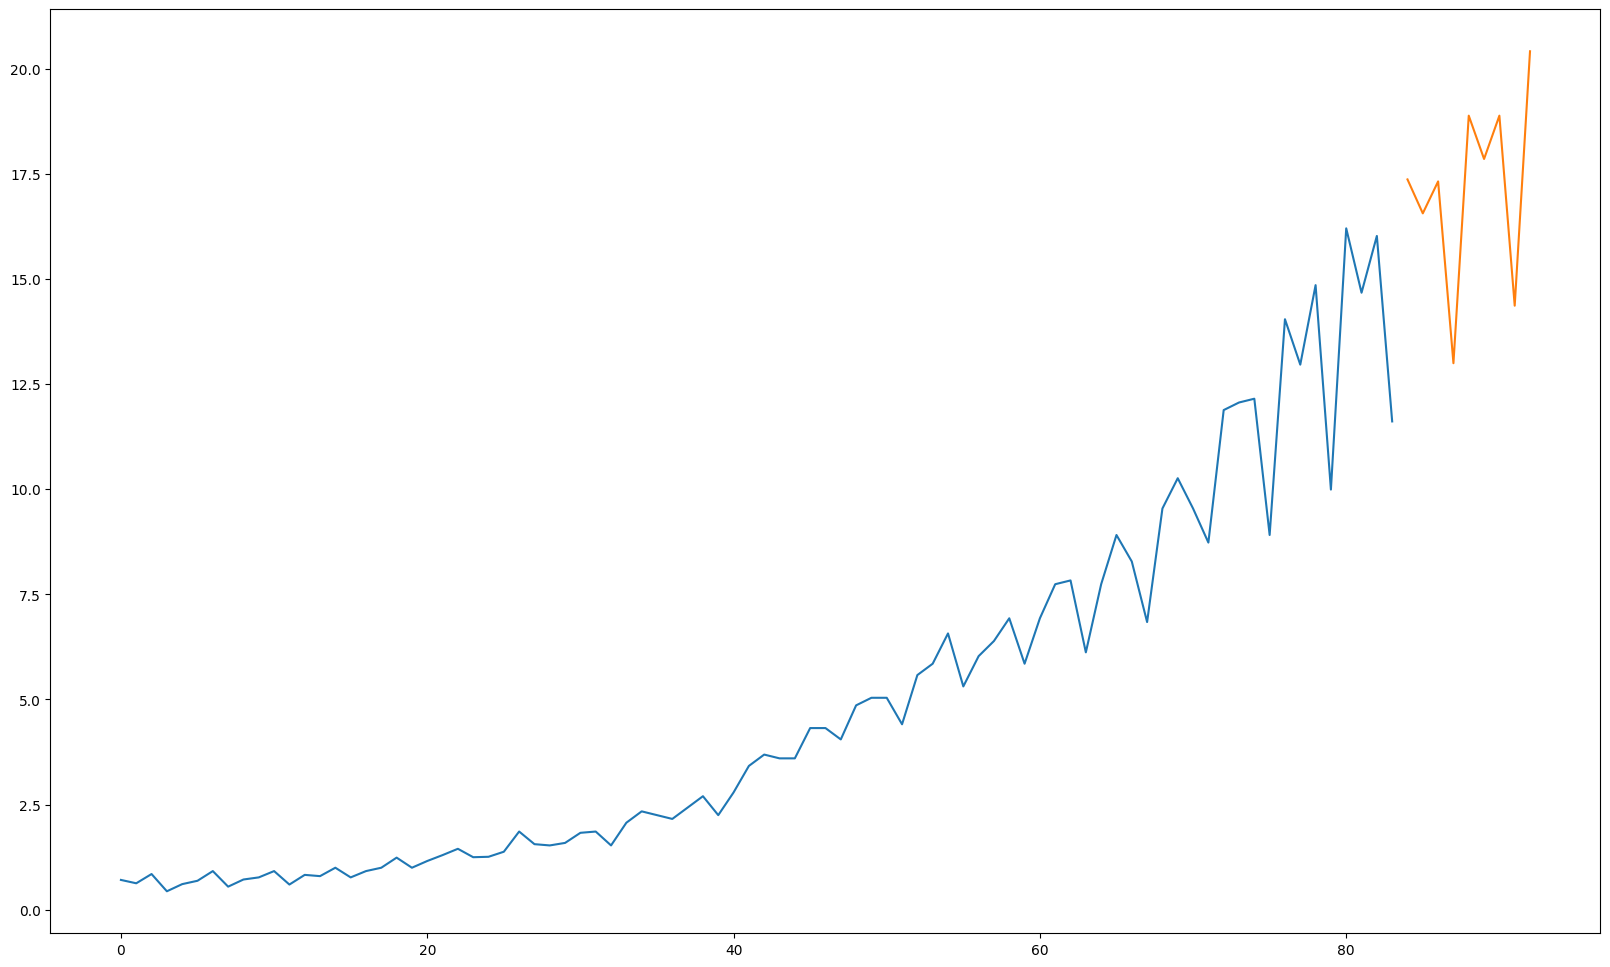

In [84]:
plt.figure(figsize=(20,12))
real_data=data2['data'].append(pd.Series([0,0,0,0,0,0,0,0]))
plt.plot(data2['data'])
plt.plot(forcast)
plt.show()